In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Preparation:

In [2]:
df=pd.read_csv('C:/Users/RUTU/Desktop/Data Science/DS_New Assi/Decision Tree/Decision Tree/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


### EDA:

In [3]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


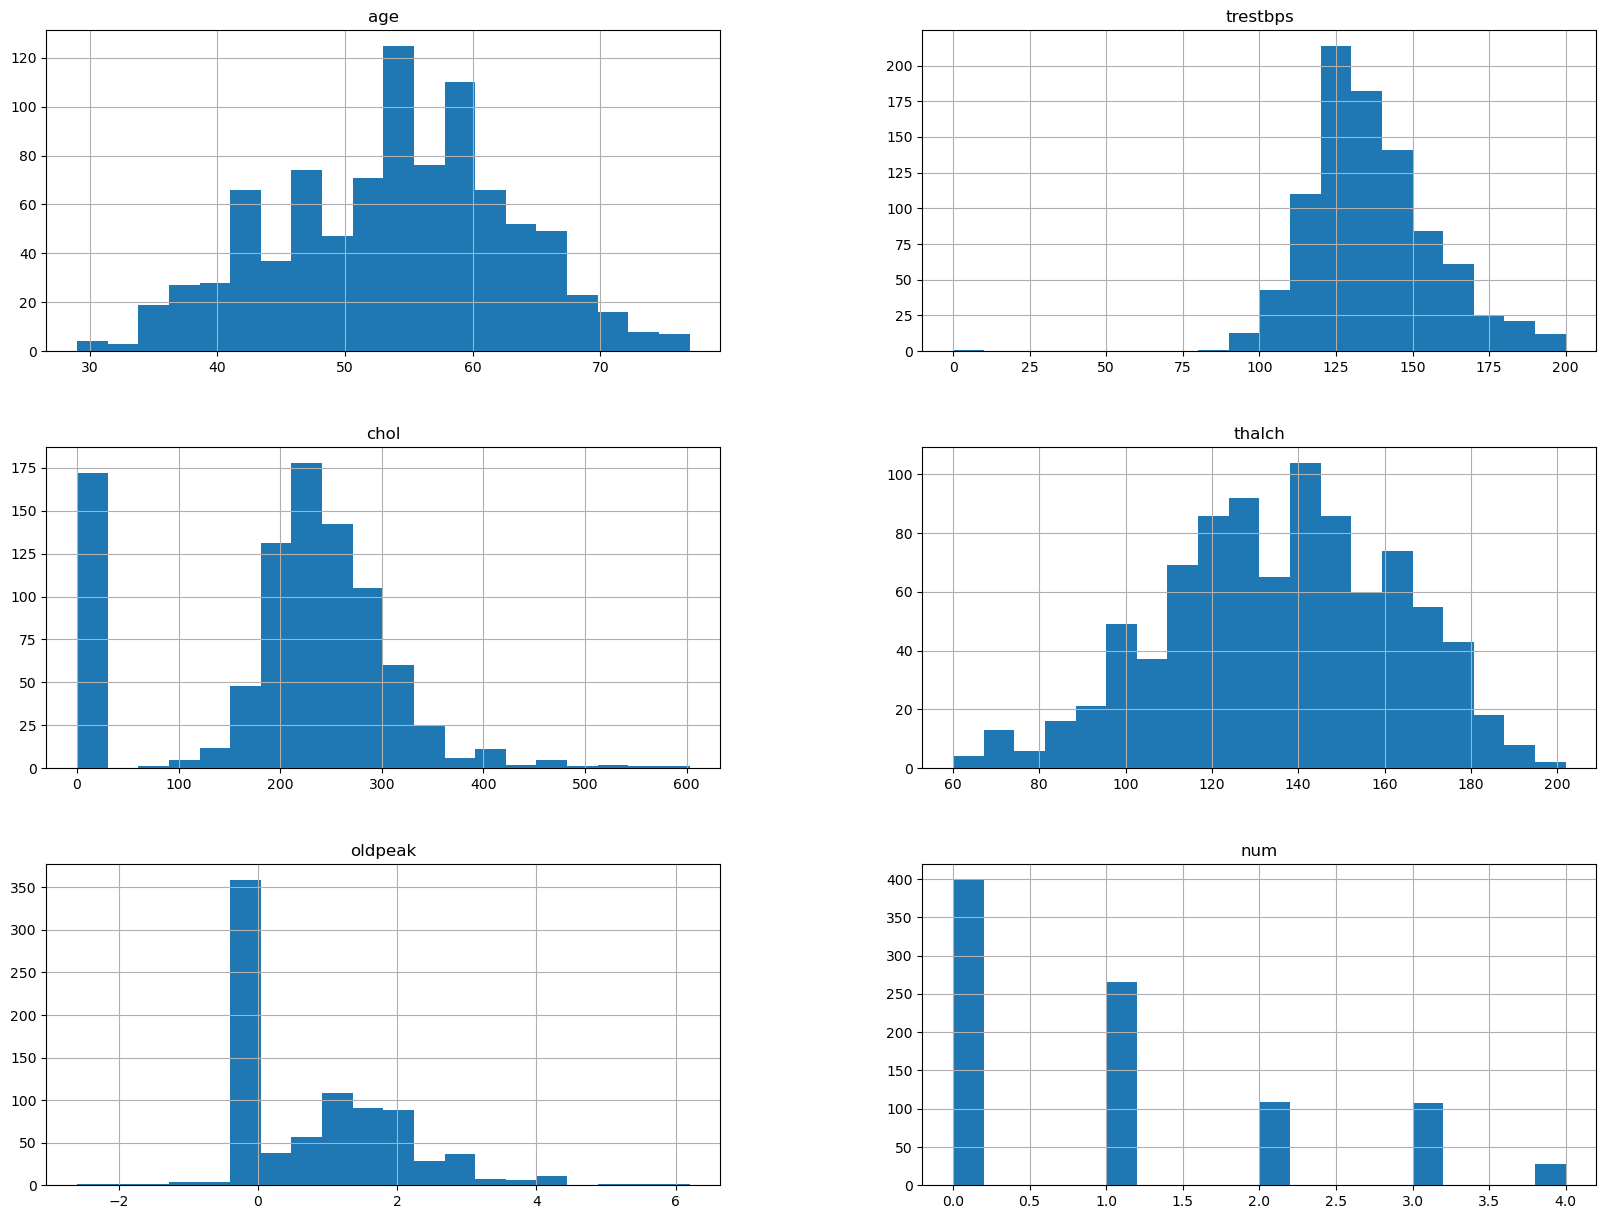

In [6]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

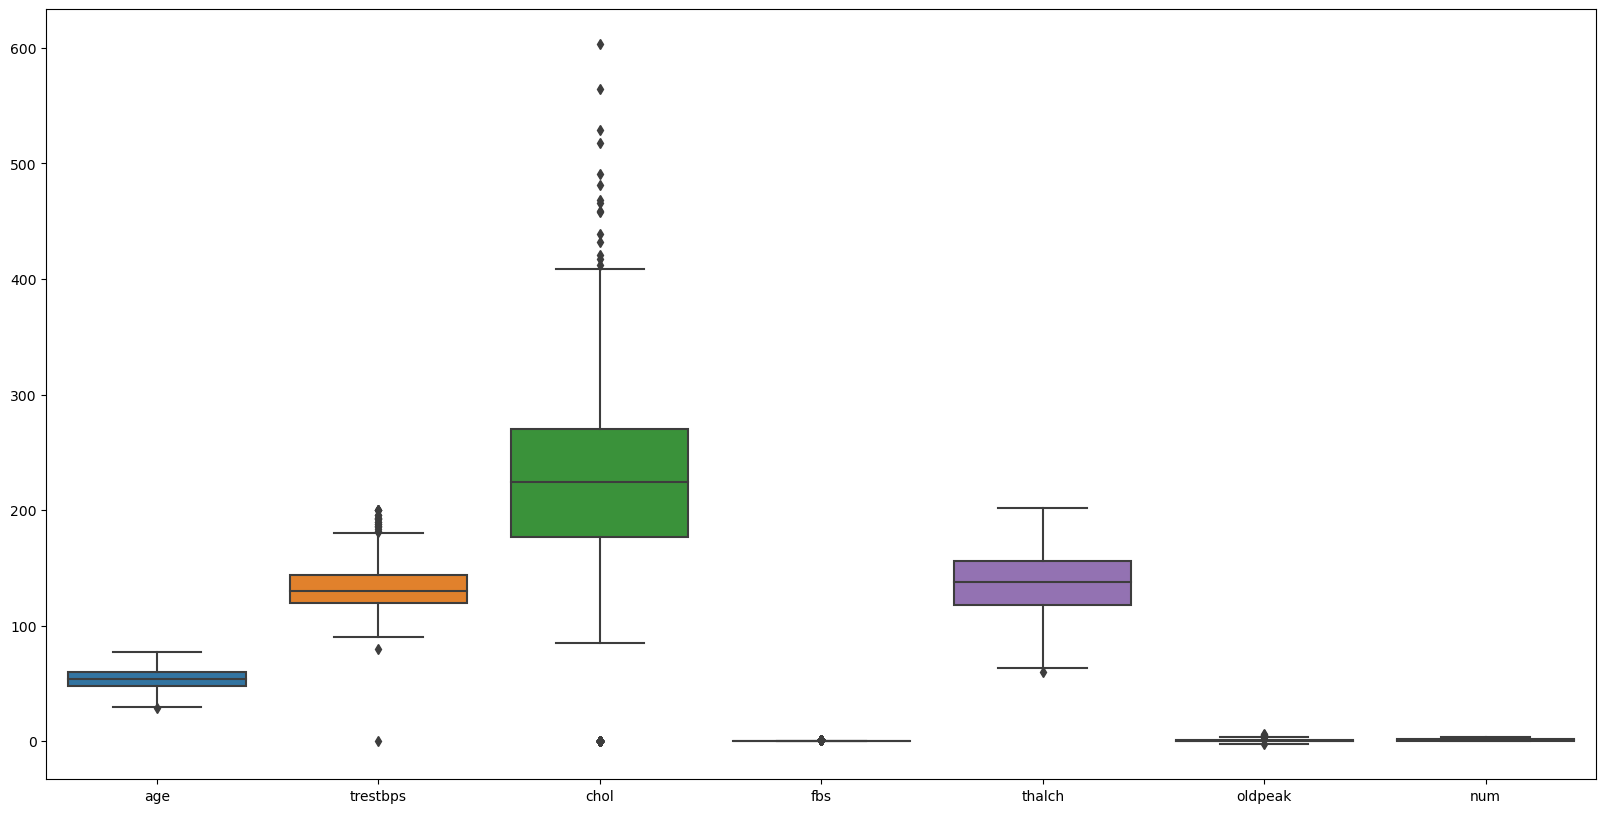

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()

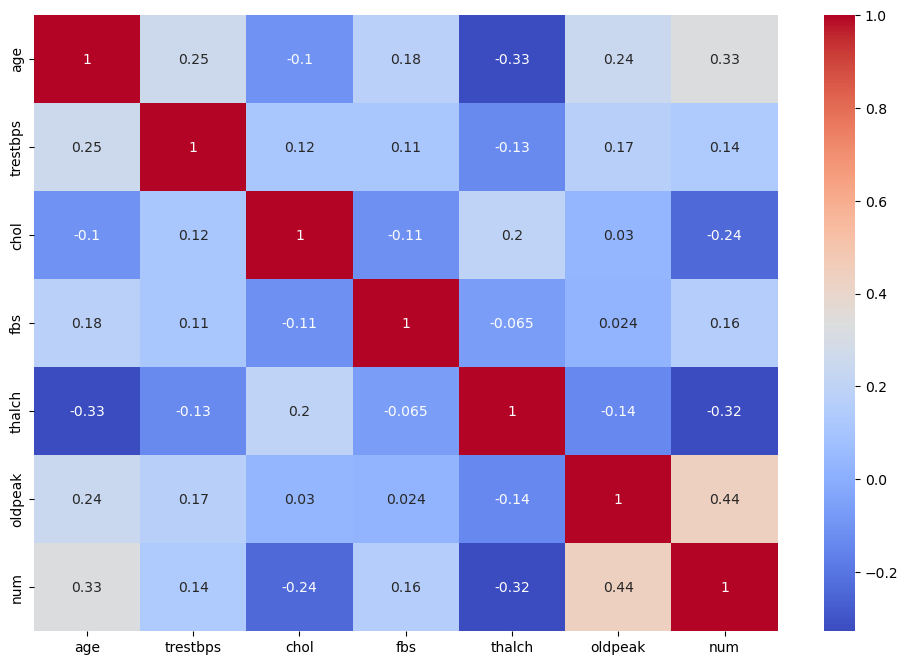

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Feature Engineering:

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('num', axis=1)  # Replace 'target_column' with the actual target column name
y = df['num']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Verify transformation
print(X_train_processed.shape)
print(X_test_processed.shape)
print(type(X_train_processed))
print(type(X_test_processed))


(726, 23)
(182, 23)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Decision Tree Classification:

In [20]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')


ValueError: could not convert string to float: 'Male'

### Hyperparameter Tuning:

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 242, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\sklearn\base.py", line 616, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 838, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 526, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 299, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 230, in astype_array
    values = astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RUTU\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 170, in astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Male'


### Model Evaluation Analysis:

In [22]:
from sklearn.tree import plot_tree

# Analyze the performance
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_processed)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test_processed), multi_class='ovr')

print(f'Best Model Accuracy: {accuracy_best}')
print(f'Best Model Precision: {precision_best}')
print(f'Best Model Recall: {recall_best}')
print(f'Best Model F1-Score: {f1_best}')
print(f'Best Model ROC-AUC: {roc_auc_best}')

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=numerical_cols.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)), class_names=['Class 1', 'Class 2'], filled=True)
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'